In [4]:
import pandas as pd
df = pd.read_csv('Data/reviews.csv', encoding='ISO-8859-1')
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
df.groupby("Sentiment").describe()

Text                                                             
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...  \
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [7]:
df = df.drop_duplicates()
df.groupby("Sentiment").describe()

Text                                                             
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...  \
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

### CountVectorizer to prepare and vectorize the text in the Text column. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),stop_words="english",min_df=20)
x = vectorizer.fit_transform(df["Text"])
y = df["Sentiment"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [11]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd


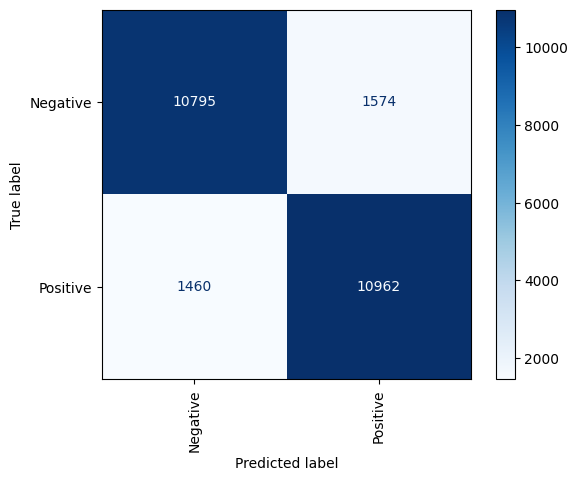

In [13]:
cmd.from_estimator(model, x_test, y_test,display_labels=["Negative","Positive"],cmap="Blues",xticks_rotation="vertical")

In [19]:
text = 'The food was great and the service was excellent!'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8532848382151738